Cosmology (compact) SS2020

# Exercise 3

## 4. Build your own Cosmological Calculator (Part II)

Plot the evolution of growth factor.

In [7]:
import astropy.constants as cst
import scipy.integrate as intg
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

H0 = 67 # km/s /Mpc
km_Mpc = (u.km/u.Mpc).to(1)

def a(z):
    return 1/(1+z)

def E(z, dict):
    return np.sqrt(dict["Omega_r0"]*(1+z)**4+dict["Omega_m0"]*(1+z)**3+(1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"])*(1+z)**2+dict["Omega_L0"])

# Hubble factor
def H(z, dict):
    return H0*E(z,dict)
H_vectorized = np.vectorize(H)

# Density parameters
def Omega_m(z, dict):
    return dict["Omega_m0"]*(1+z)**3/E(z, dict)**2
def Omega_r(z, dict):
    return dict["Omega_r0"]*(1+z)**4/E(z, dict)**2
def Omega_L(z, dict):
    return dict["Omega_L0"]/E(z, dict)**2
def Omega_K(z, dict):
    Omega_K0 = 1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"]
    return Omega_K0*(1+z)**2/E(z, dict)**2


def g(z, dict):
    O_m = Omega_m(z, dict)
    O_L = Omega_L(z, dict)
    return 2.5*O_m/(O_m**(4/7)-O_L+(1+O_m/2)*(1+O_L/70))
def D_growth(z, dict):
    return a(z)*g(z, dict)/g(0, dict)

Define cosmological parameters for different cosmological scenario.

In [8]:
flat = {"Omega_m0": 1, "Omega_L0": 0, "Omega_r0": 0}
U2 = {"Omega_m0": 0.3, "Omega_L0": 0, "Omega_r0": 0}
LCDM = {"Omega_m0": 0.315, "Omega_L0": 0.685, "Omega_r0": 2.47*10**(-5)*(H0/100)**(-2)}

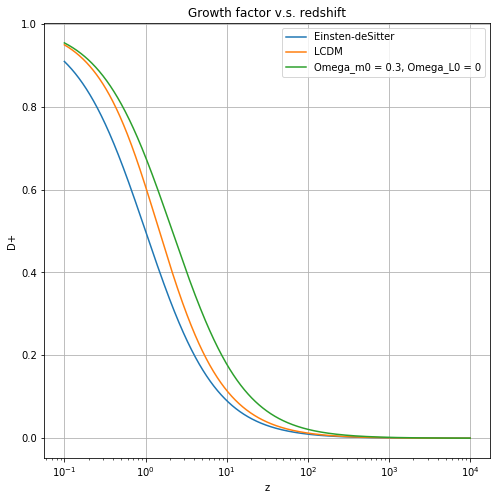

In [12]:
z = np.logspace(-1,  4, num=1000)
plt.figure(figsize = [8, 8])
plt.plot(z, D_growth(z,flat), label = "Einsten-deSitter")
plt.plot(z, D_growth(z,LCDM), label = "LCDM")
plt.plot(z, D_growth(z,U2), label = "Omega_m0 = 0.3, Omega_L0 = 0")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("D+")
plt.title("Growth factor v.s. redshift")
plt.grid()
plt.show()

The above plot shows the evolution with redshift of the Growth Factor D+ for three cosmological models: Einstein-deSitter, Low-density Universe and a Standard Cosmological Model. 

They show the same tendency: the growth is rapid when z <~ 10. 